In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
df = pd.read_csv("./DATA/DATA.csv")

In [207]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=22051662)

In [208]:
xcols = ['il', 'iw', 'pw', 'ro']
ycols = ['freq', 's11', 'gain']

In [209]:
X_train, X_test = train[xcols].values, test[xcols].values
y_train, y_test = train[ycols].values, test[ycols].values

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
Scaler_X = MinMaxScaler().fit(X_train)
Scaler_Y = MinMaxScaler().fit(y_train)

In [212]:
X_train_scaled = Scaler_X.transform(X_train)
X_test_scaled = Scaler_X.transform(X_test)

y_train_scaled = Scaler_Y.transform(y_train)
y_test_scaled = Scaler_Y.transform(y_test)

In [213]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', 'accuracy', 'r2_score'],
    jit_compile='auto'
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,085,251 (4.14 MB)

 Trainable params: 1,085,251 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [214]:
EPOCHS = 1000

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.15,
    epochs=EPOCHS
)

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5708 - loss: 0.1629 - mae: 0.3201 - mse: 0.1629 - r2_score: -2.0416 - val_accuracy: 0.6507 - val_loss: 0.0512 - val_mae: 0.1700 - val_mse: 0.0512 - val_r2_score: 0.1341
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5954 - loss: 0.0474 - mae: 0.1594 - mse: 0.0474 - r2_score: 0.2350 - val_accuracy: 0.5685 - val_loss: 0.0394 - val_mae: 0.1509 - val_mse: 0.0394 - val_r2_score: 0.3348
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5583 - loss: 0.0361 - mae: 0.1402 - mse: 0.0361 - r2_score: 0.3861 - val_accuracy: 0.5959 - val_loss: 0.0292 - val_mae: 0.1377 - val_mse: 0.0292 - val_r2_score: 0.4927
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6321 - loss: 0.0315 - mae: 0.1327 - mse: 0.0315 - r2_score: 0.4718 - val_accuracy: 0.6301 - val_loss: 0.0244 - val_mae: 0.1184 - val_mse: 0.0244 - val_r2_score: 0.5659
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accu

In [215]:
model.get_metrics_result()

{'accuracy': 0.931506872177124,
 'loss': 0.004644242115318775,
 'mae': 0.027199875563383102,
 'mse': 0.004644242115318775,
 'r2_score': 0.9272279739379883}

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


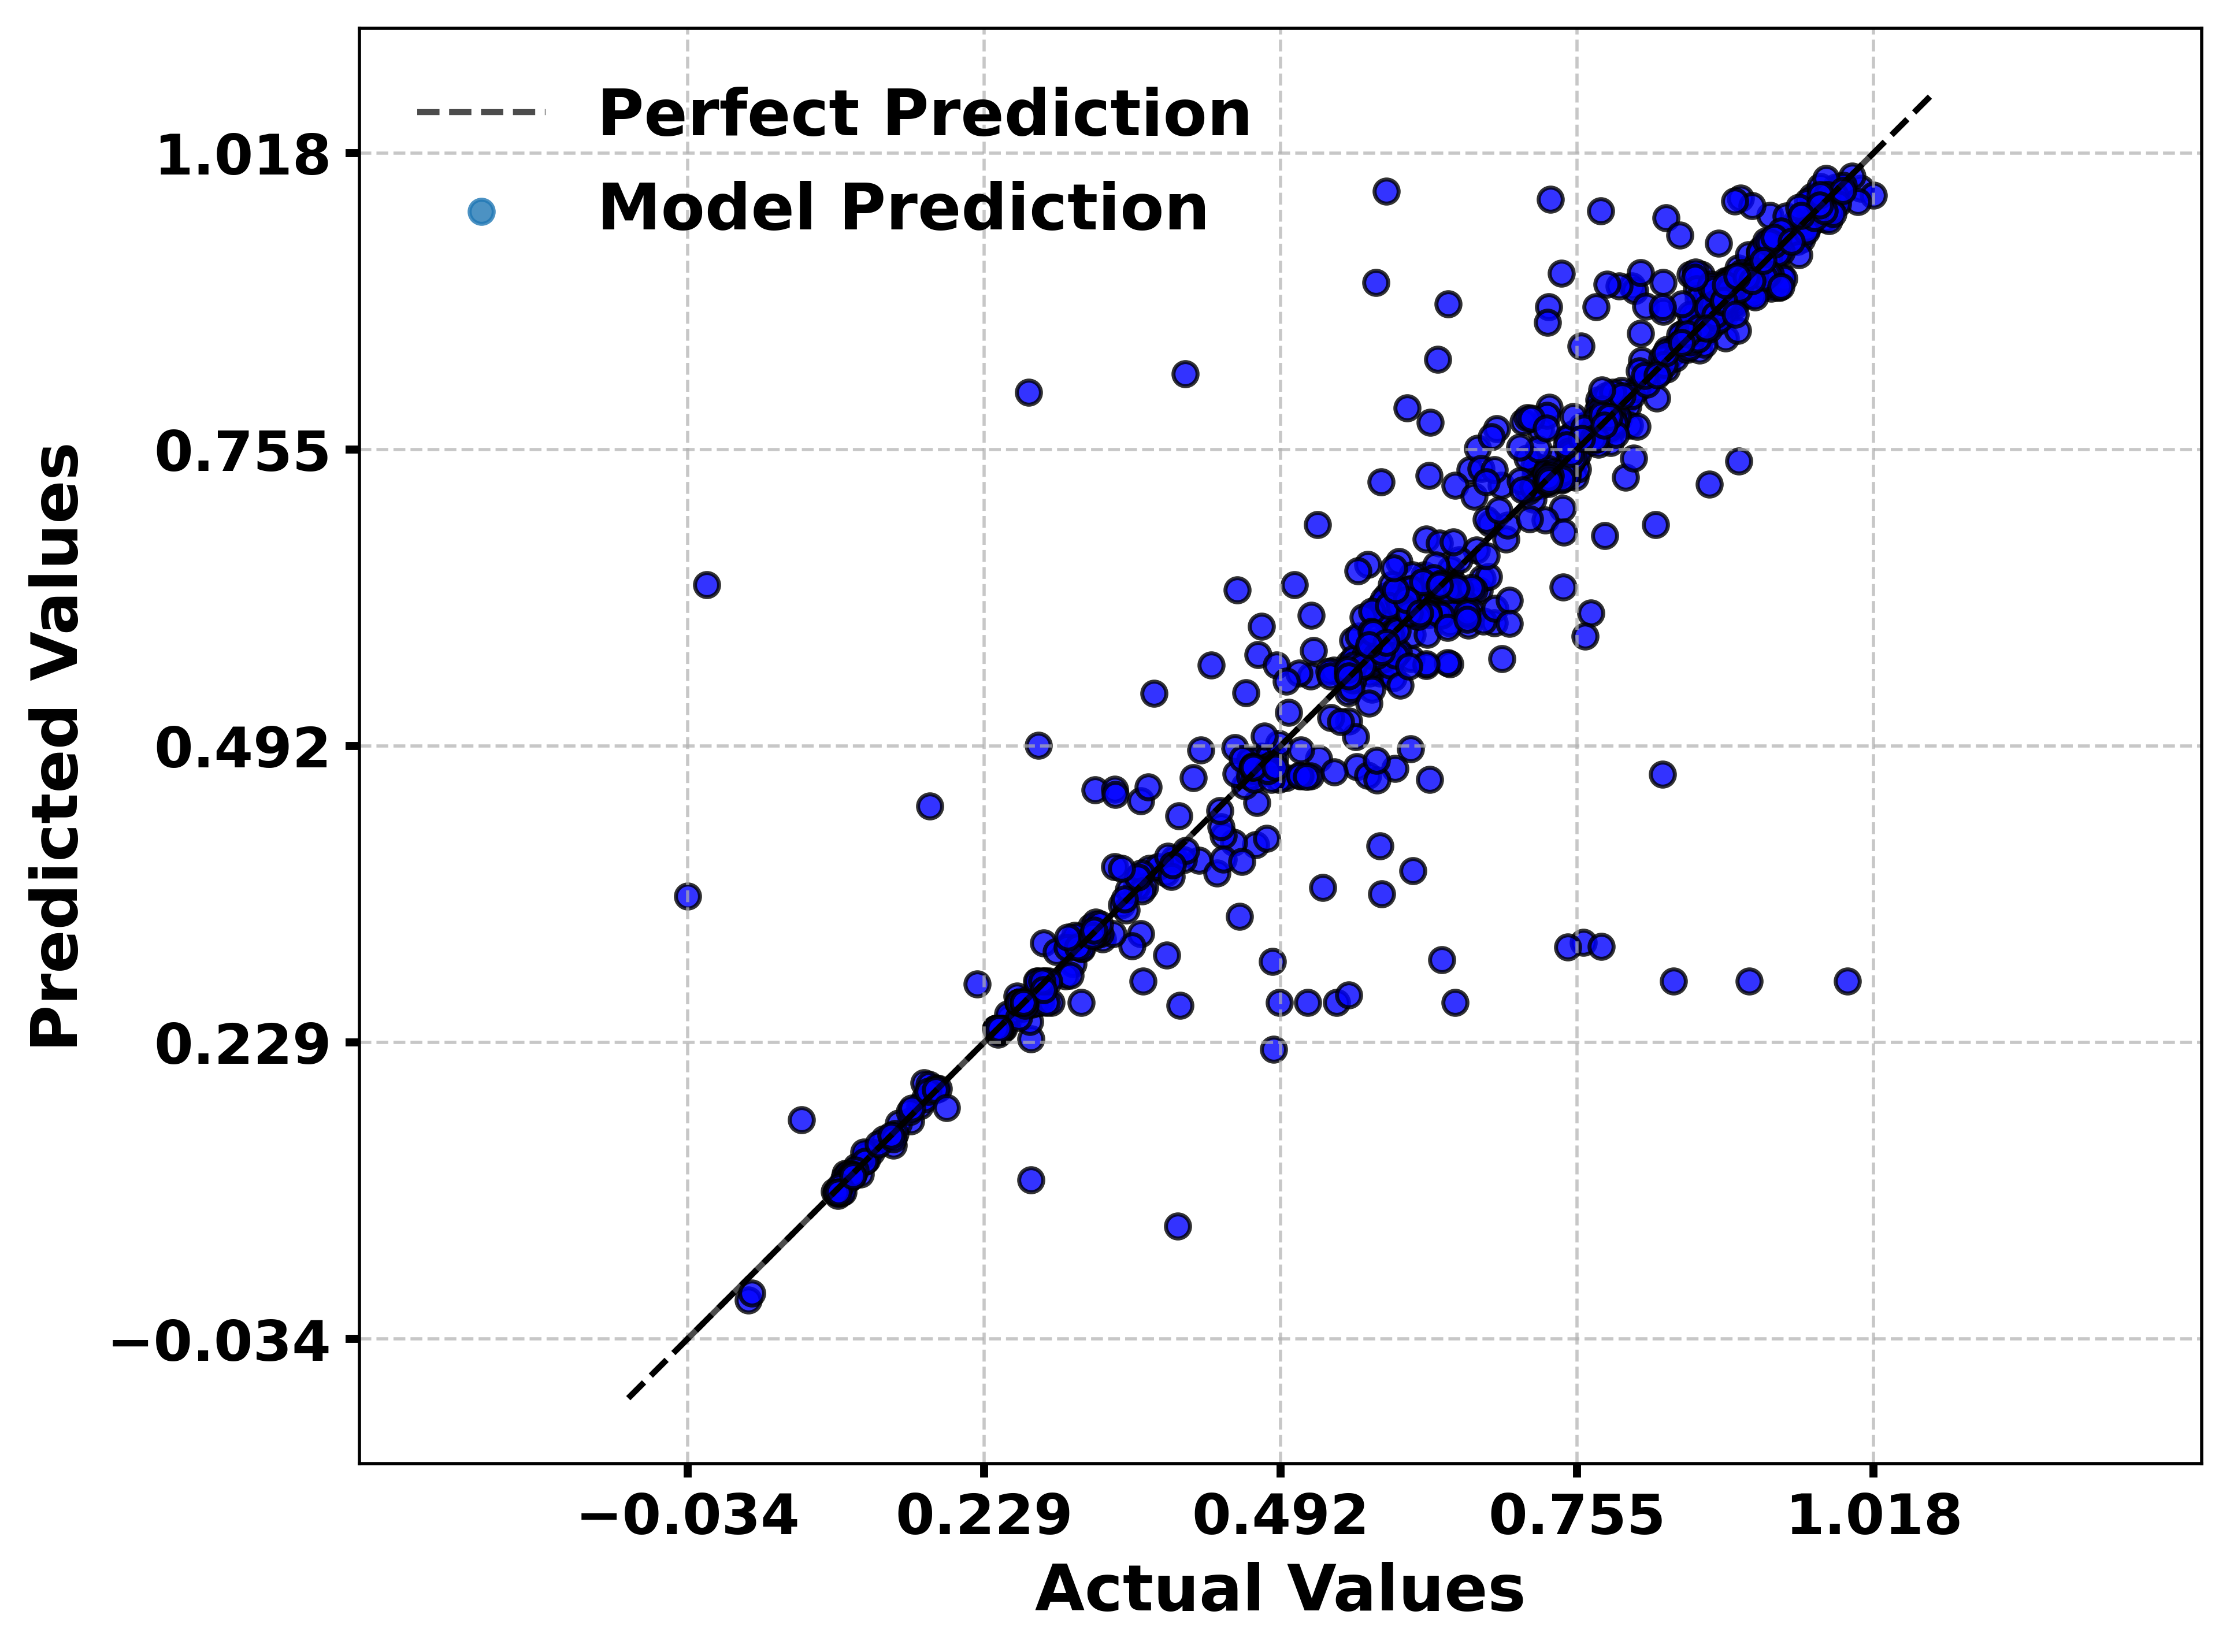

R² Score: 0.8996
Mean Absolute Error (MAE): 0.0302
Mean Squared Error (MSE): 0.0059
Explained Variance Score: 0.8999


In [222]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

plt.rcParams.update({'font.size': 16})

def plot_predictions(model, X_test_scaled, y_test_scaled):
    predicted = model.predict(X_test_scaled)
    

    display = PredictionErrorDisplay(y_true=y_test_scaled, y_pred=predicted)    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=500)
    display.plot(kind="actual_vs_predicted", ax=ax)
 
    ax.set_xlabel("Actual Values", fontsize=16, fontweight='bold') 
    ax.set_ylabel("Predicted Values", fontsize=16, fontweight='bold') 
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    ax.grid(True, linestyle='--', alpha=0.7)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="black") 
    
    legend = ax.legend(['Perfect Prediction', 'Model Prediction'], loc='upper left', fontsize=16, frameon=False)
    for text in legend.get_texts():
        text.set_fontweight('bold')

    ax.lines[0].set_color('black') 
    ax.collections[0].set_edgecolor('black') 
    ax.collections[0].set_facecolor('blue')

    plt.tight_layout()
    plt.savefig(r'C:\Users\KIIT\OneDrive\Documents\RESEARCH_PAPERS\SHARAD\DRAFTS\NEURAL_NETWORK\MANUSCRIPT\NeuralNetwork.png', dpi=500)
    plt.show()

    return predicted


predicted = plot_predictions(model, X_test_scaled, y_test_scaled)

r2 = r2_score(y_test_scaled, predicted)
mae = mean_absolute_error(y_test_scaled, predicted)
mse = mean_squared_error(y_test_scaled, predicted)
explained_variance = explained_variance_score(y_test_scaled, predicted)

print(f"\033[1mR² Score:\033[0m {r2:.4f}")
print(f"\033[1mMean Absolute Error (MAE):\033[0m {mae:.4f}")
print(f"\033[1mMean Squared Error (MSE):\033[0m {mse:.4f}")
print(f"\033[1mExplained Variance Score:\033[0m {explained_variance:.4f}")

In [217]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

mse = history.history['mse']
val_mse = history.history['val_mse']

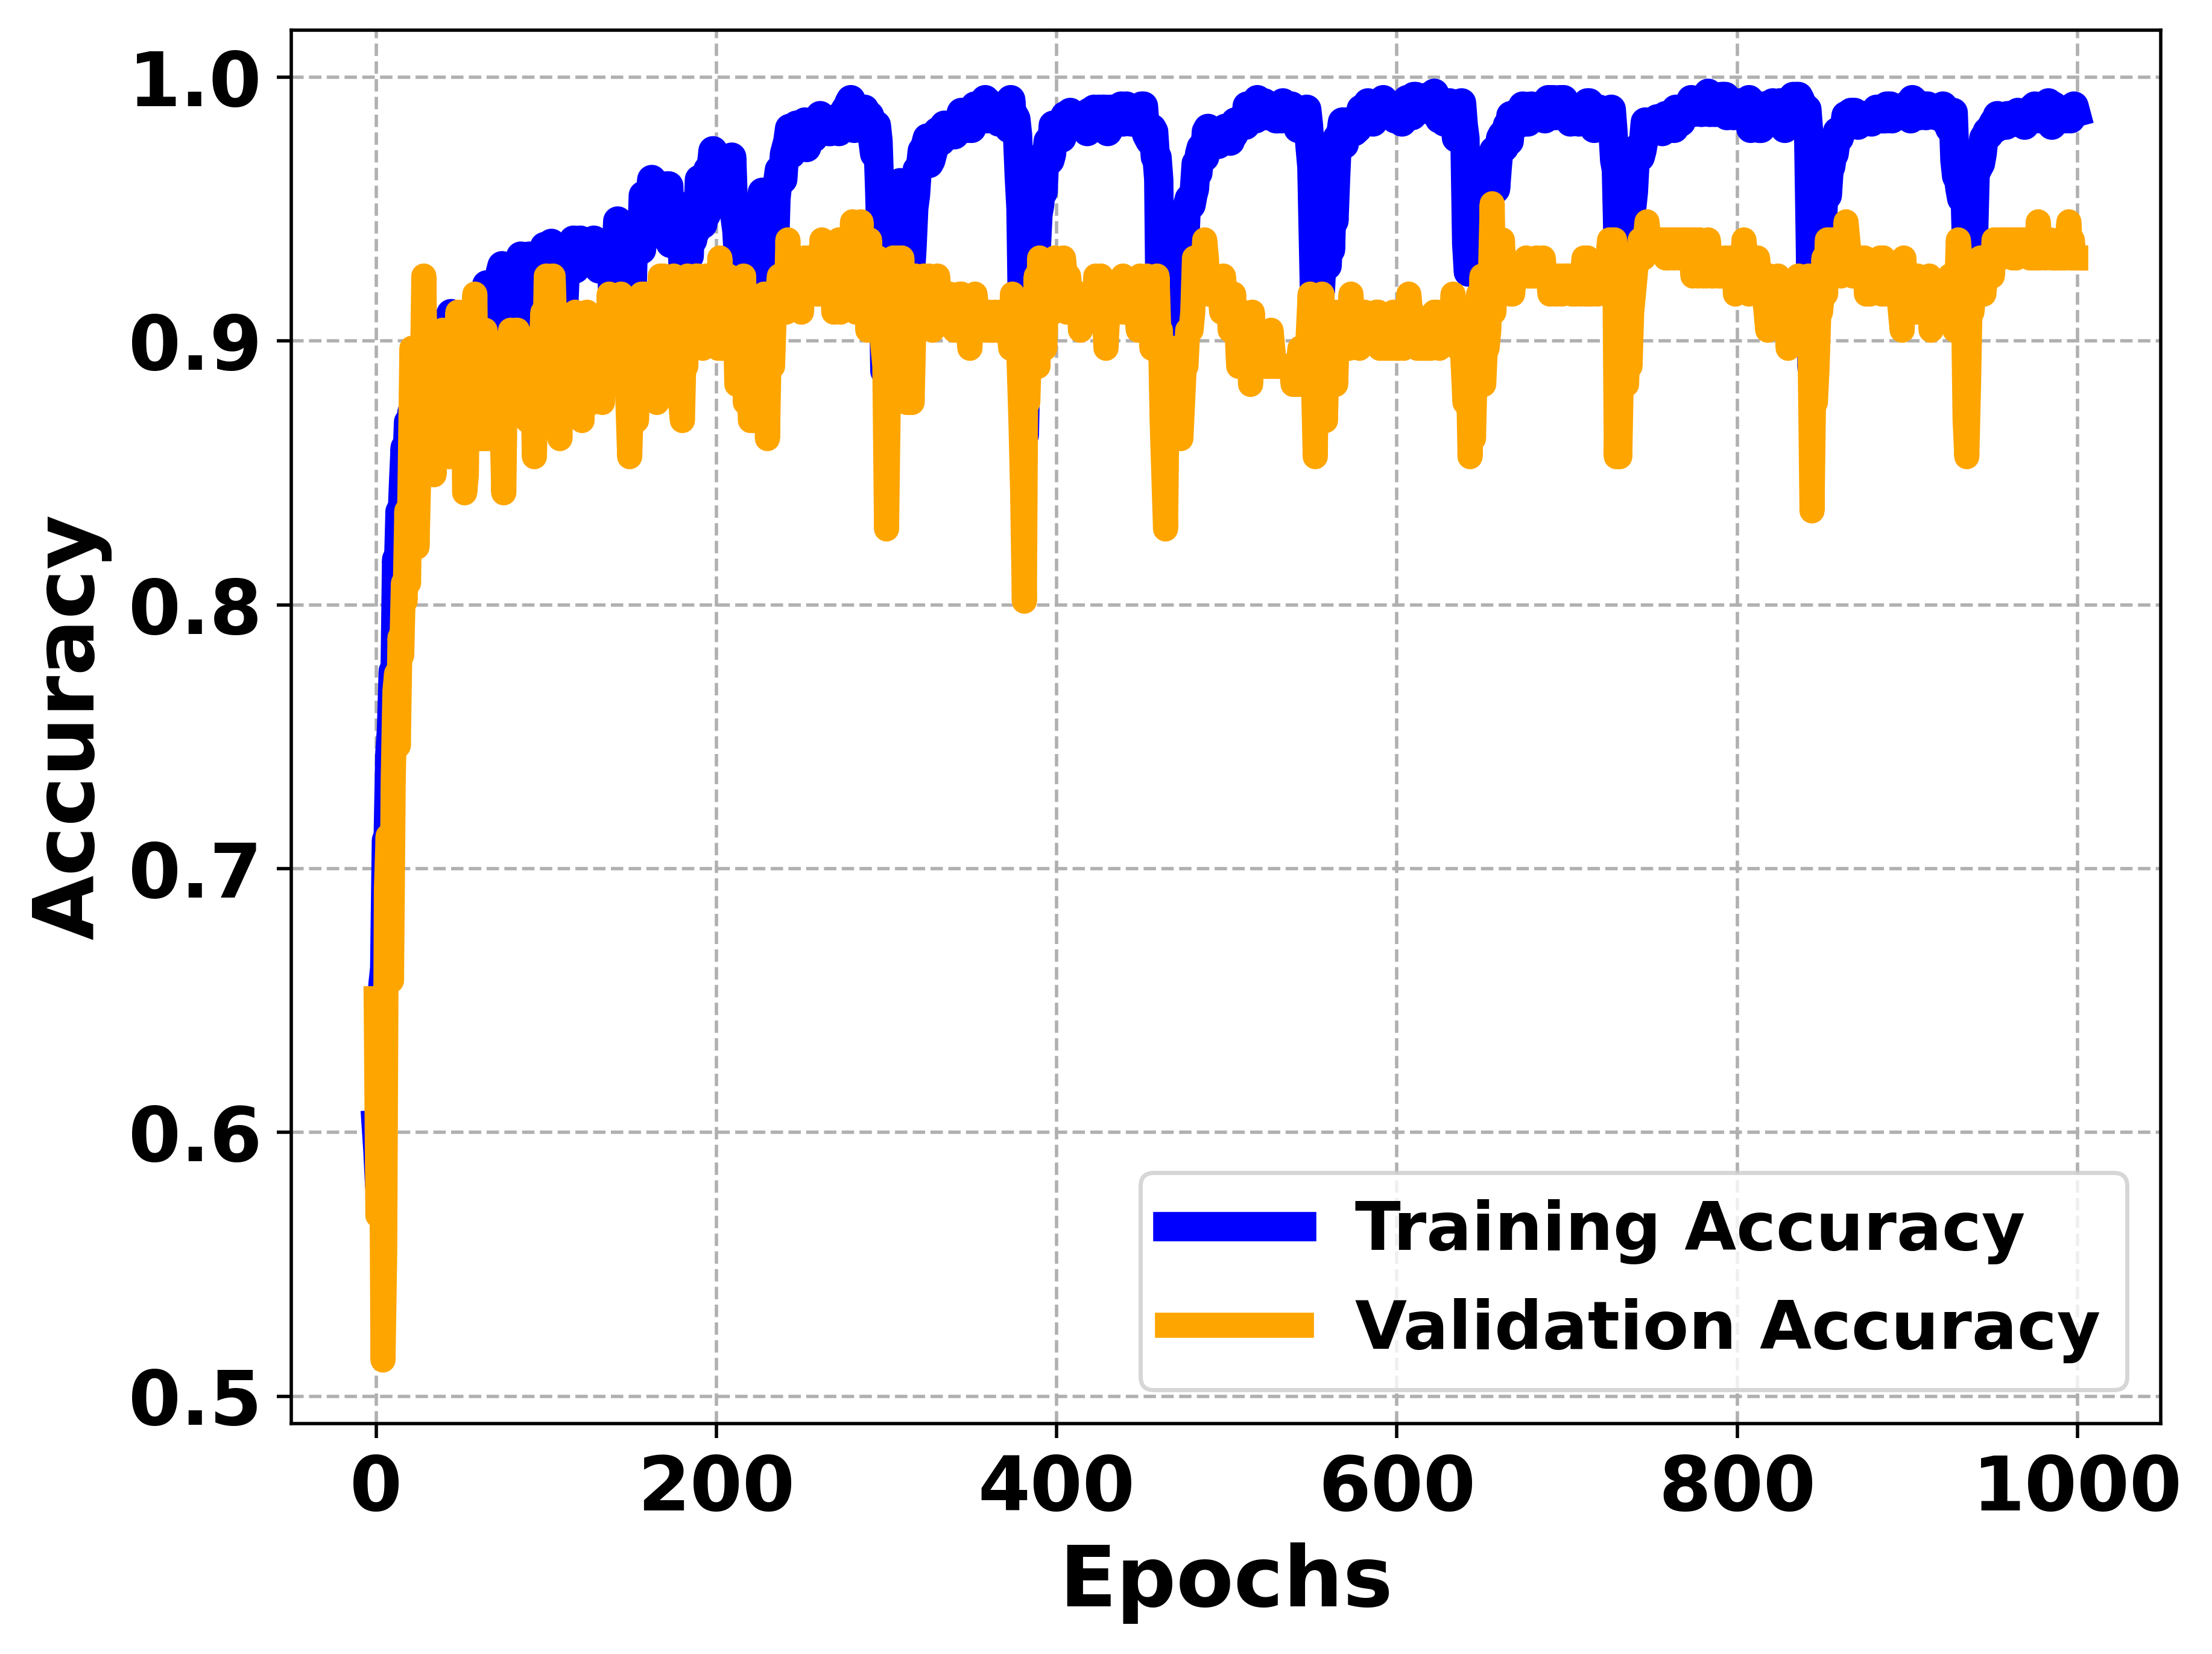

In [218]:

plt.figure(figsize=(8, 6), dpi=500)
plt.plot(accuracy, label='Training Accuracy', color='blue', linewidth=7, alpha=1)
plt.plot(val_accuracy, label='Validation Accuracy', color='orange', linewidth=6, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('Accuracy', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'})  
plt.grid(True, linestyle='--', alpha=1)
plt.show()

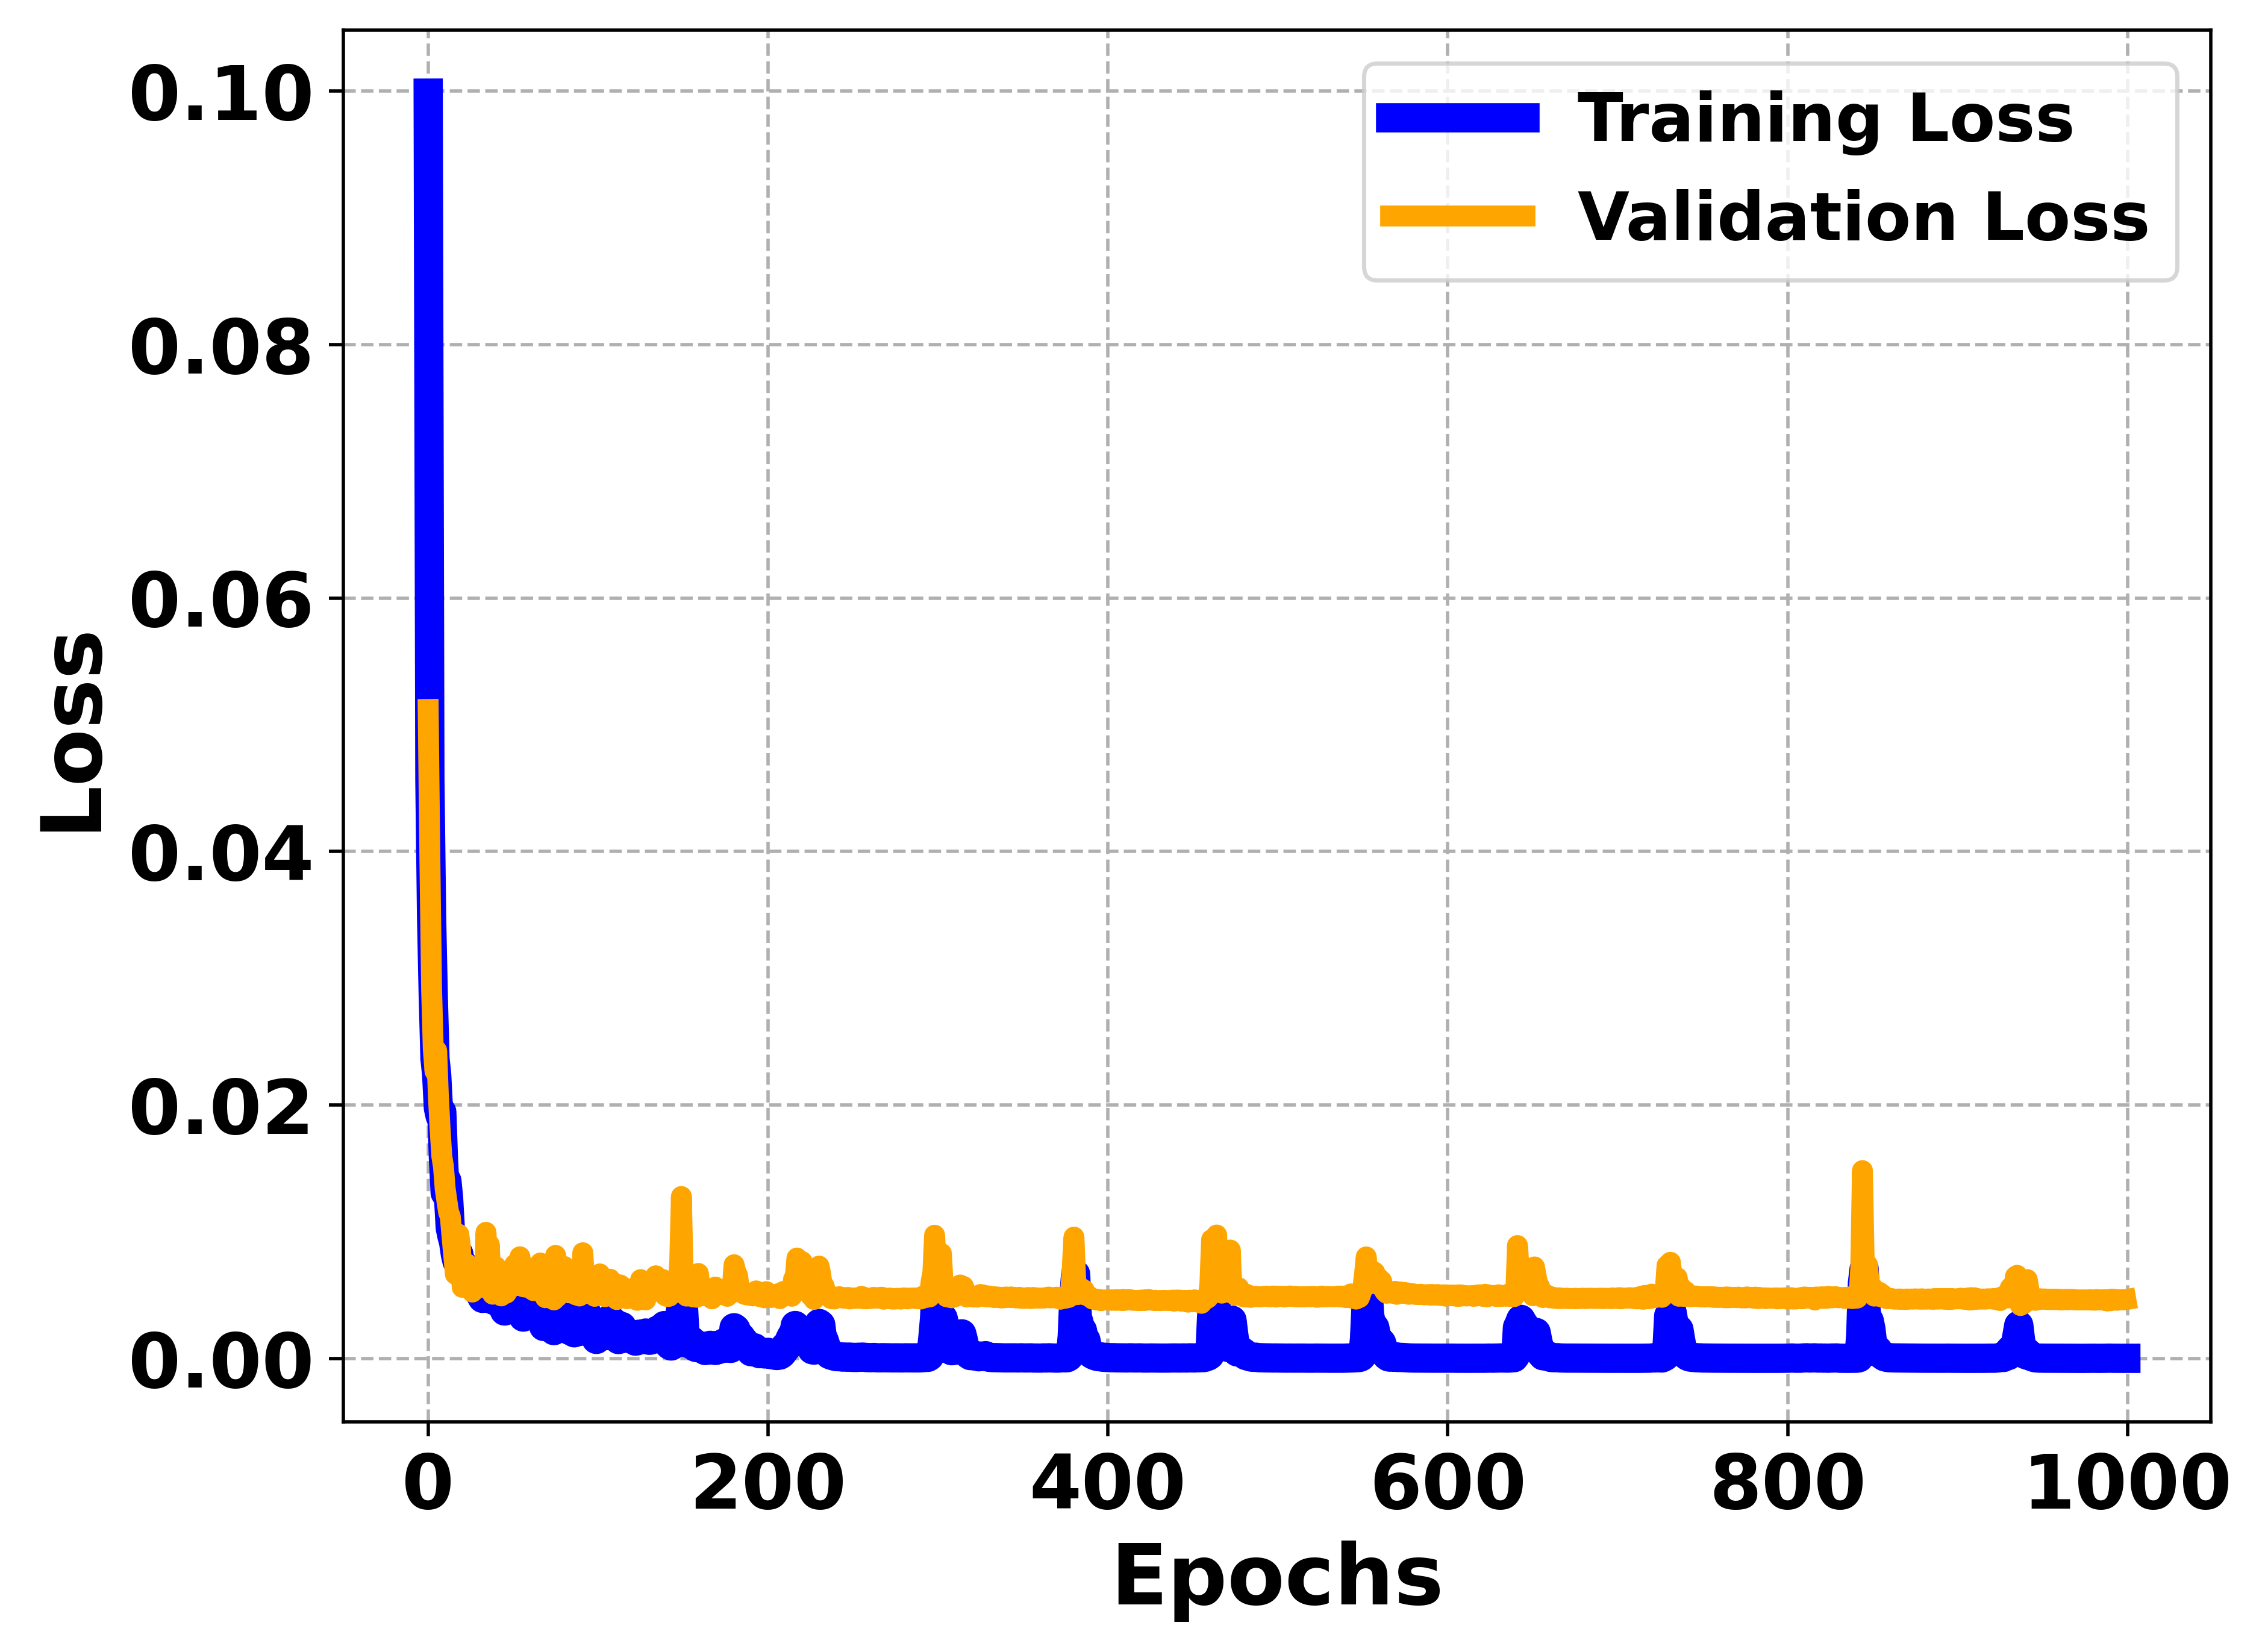

In [219]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(loss, label='Training Loss', color='blue', linewidth=7, alpha=1)
plt.plot(val_loss, label='Validation Loss', color='orange', linewidth=5, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('Loss', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'}) 
plt.grid(True, linestyle='--', alpha=1)
plt.show()

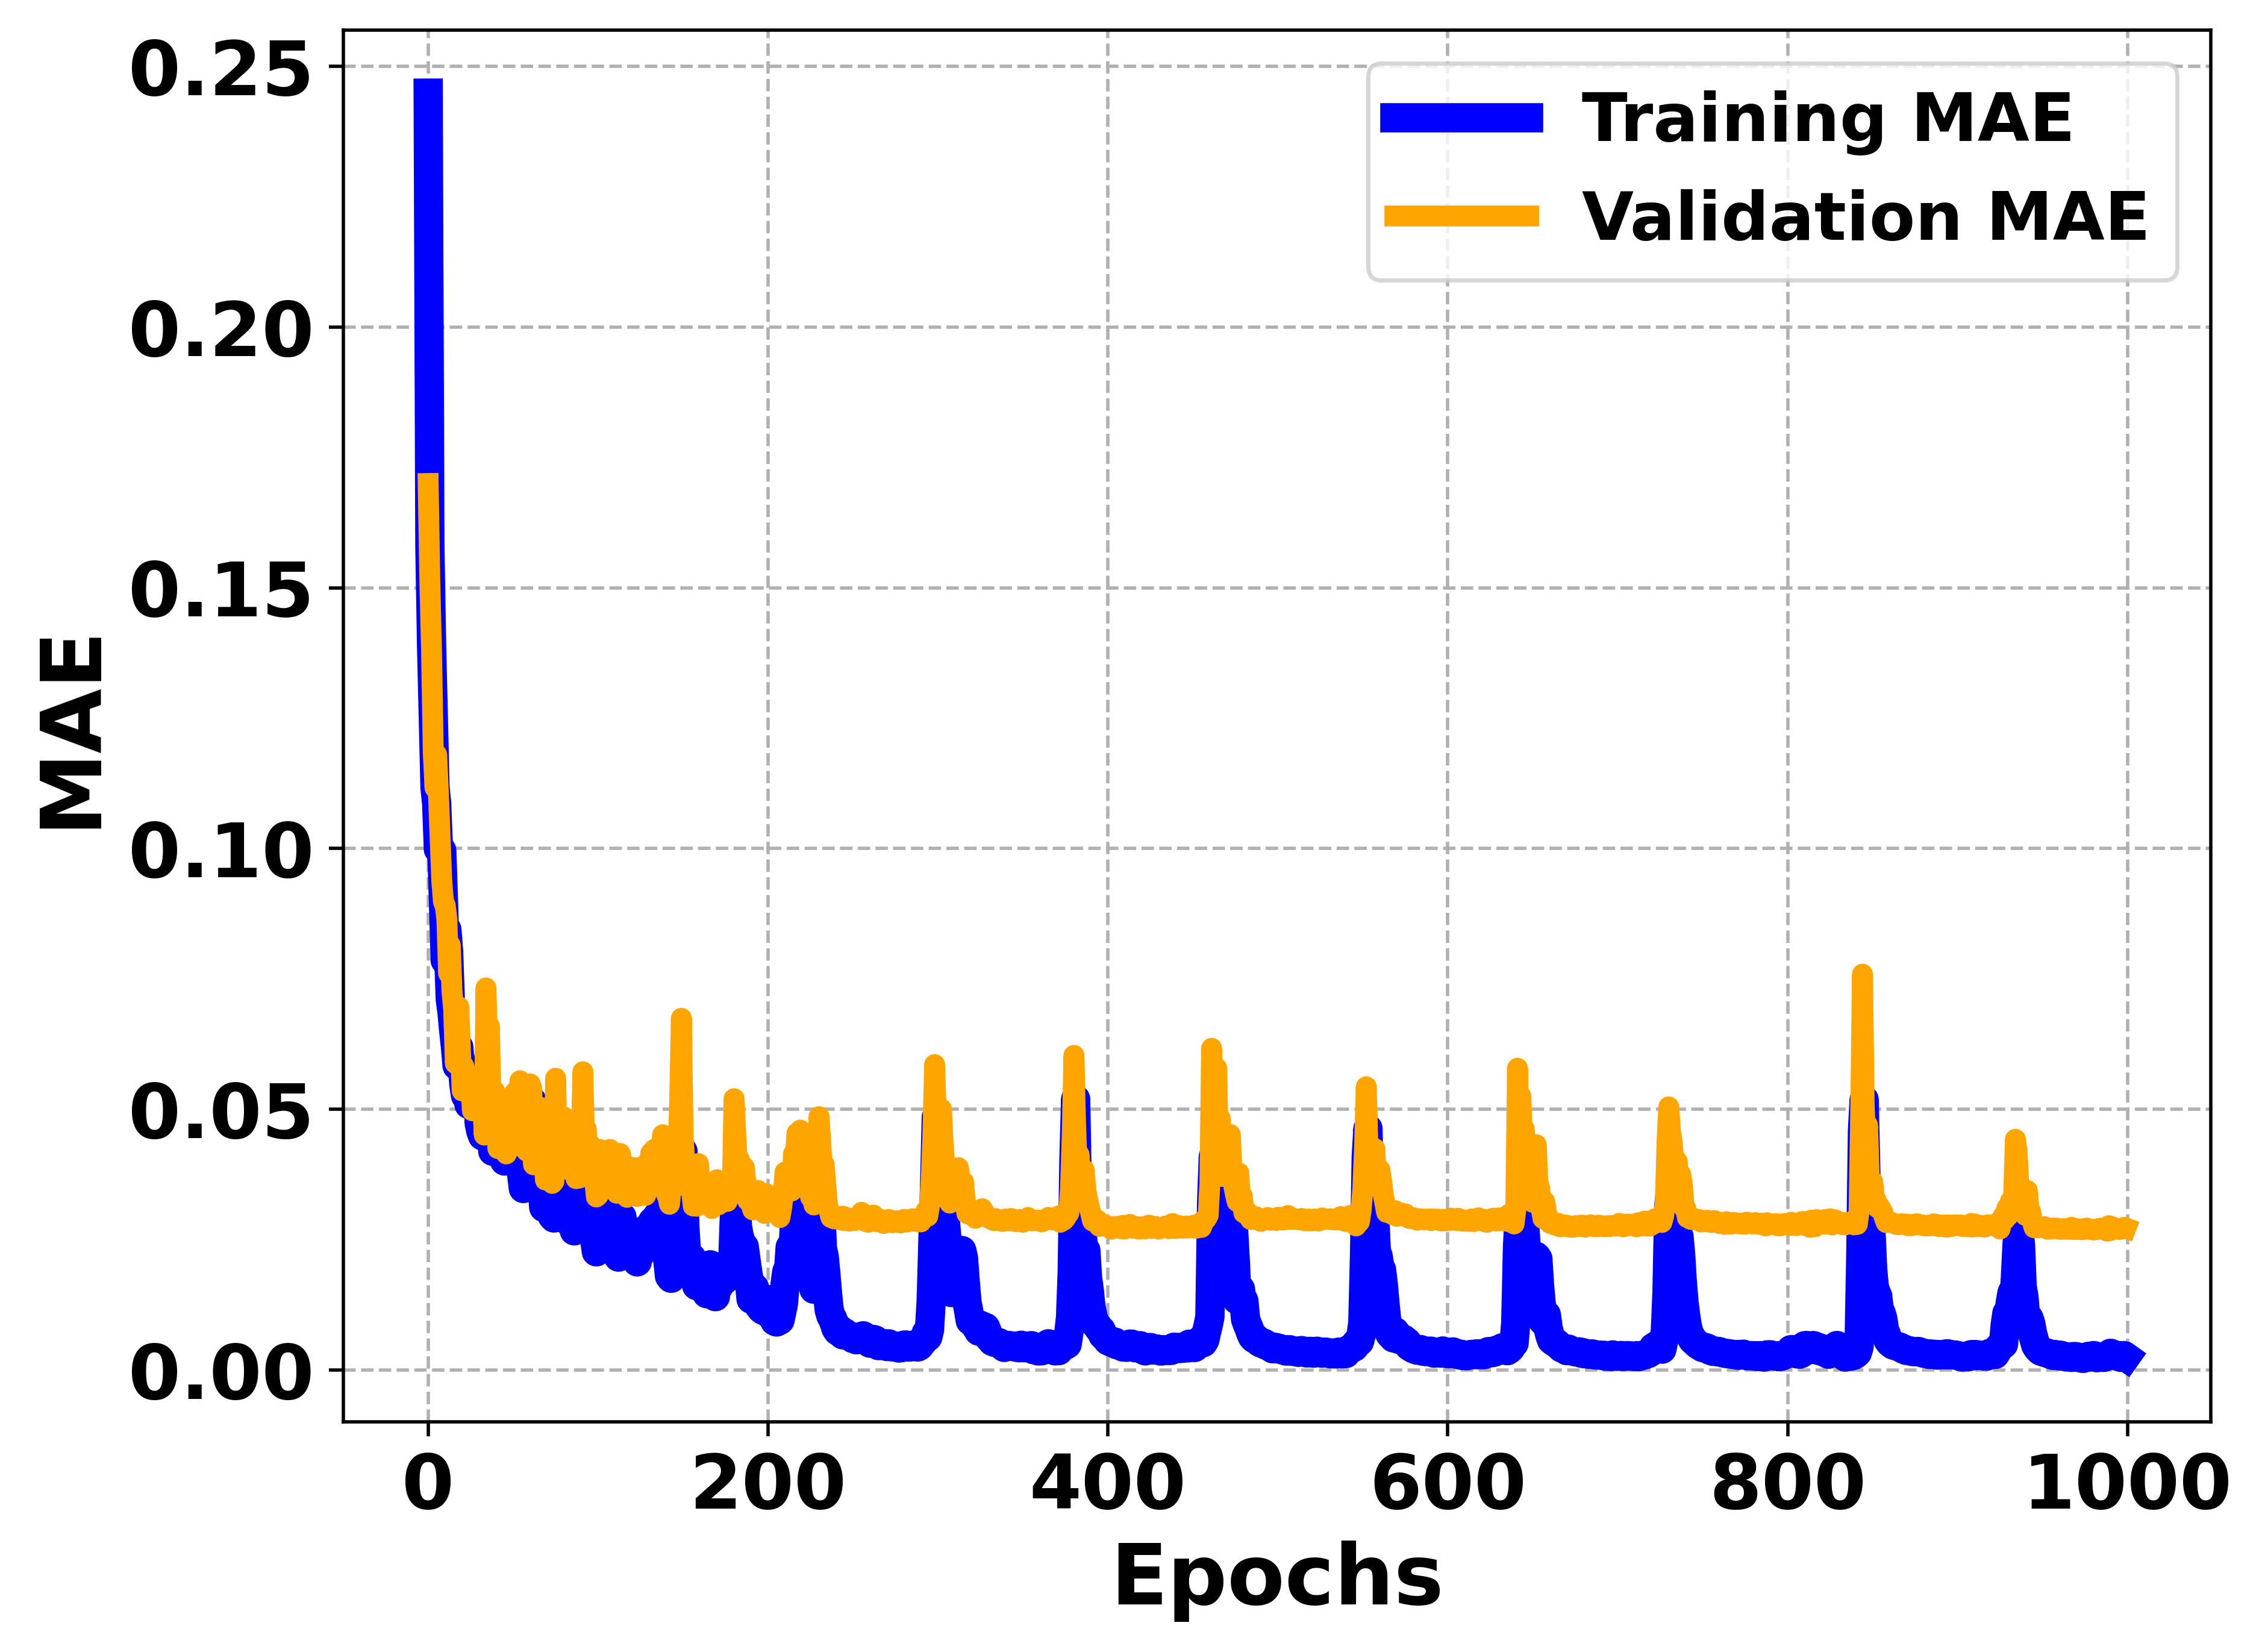

In [220]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(mae, label='Training MAE', color='blue', linewidth=7, alpha=1)
plt.plot(val_mae, label='Validation MAE', color='orange', linewidth=5, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('MAE', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'})  
plt.grid(True, linestyle='--', alpha=1)
plt.show()

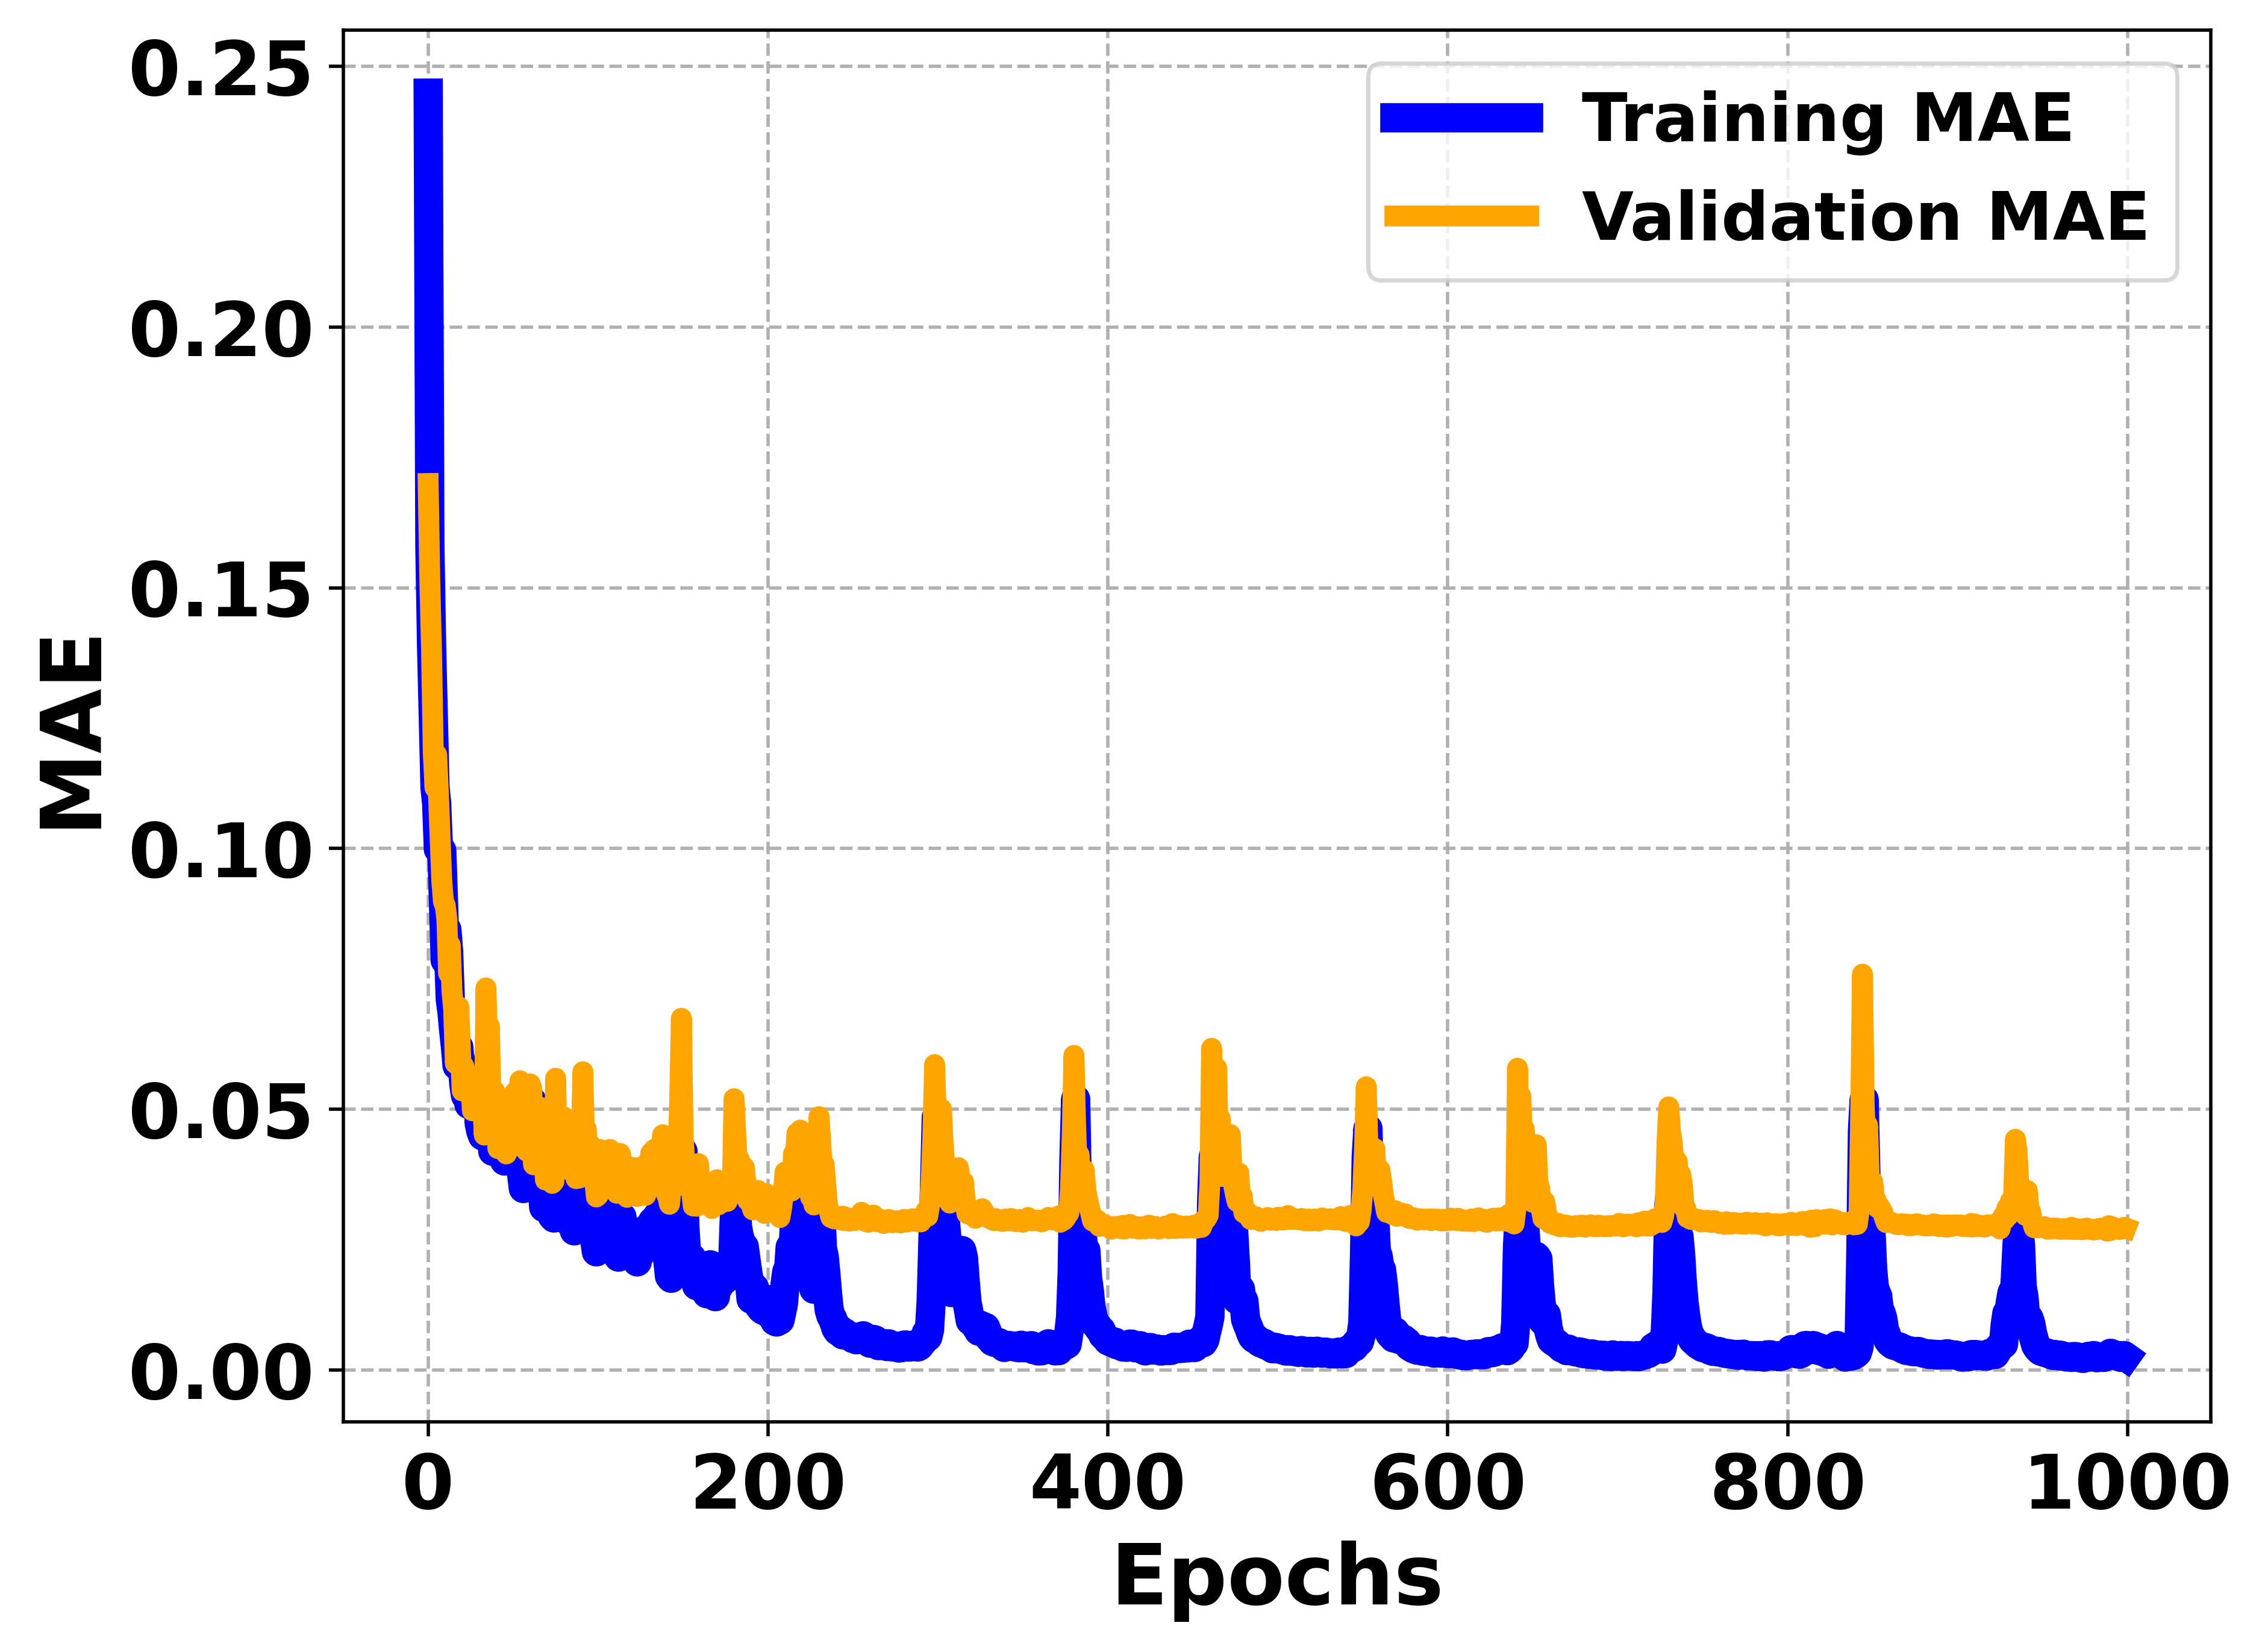

In [221]:
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(mae, label='Training MAE', color='blue', linewidth=7, alpha=1)
plt.plot(val_mae, label='Validation MAE', color='orange', linewidth=5, alpha=1)
plt.xlabel('Epochs', fontsize=20, fontweight='bold')
plt.ylabel('MAE', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend(fontsize=18, prop={'weight': 'bold'})  
plt.grid(True, linestyle='--', alpha=1)
plt.show()